# Titanic Survival Predictor

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Training Data

In [2]:
df = pd.read_csv('~/Downloads/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Make a backup/copy of the original dataframe that I can reference if necessary
df_og = df.copy(deep=True)

In [5]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Clean and Explore Data

In [6]:
### Initial Notes ###
# PassengerId is needed for the submission, so keep it even though it's mildly redunduntant with the pandas auto keys
# The only thing that seems extraneous right off the bat is the Name of the passenger. It may be worth reexploring during tuning, but removing for now
# Ticket Number likely doesn't contain much more information than Embarked, PClass, and Cabin. Removing as well

In [7]:
del df['Name']

In [8]:
del df['Ticket']

In [9]:
## move target field (Survived) to end of df for easier visualizations?

In [10]:
# Drop any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [11]:
### I could imagine cabin location onboard being useful for predicting who survives, but for a first pass let's ignore it
del df['Cabin']

In [12]:
### Age is the only other field with a significant number of missing values. But it feels to important to impute
### 'Women and children first' and etc... so let's drop it. 714 values vs 891 shouldn't impact the model too much
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


### Encode nonnumeric fields

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
oe = OrdinalEncoder()
df['Embarked_Code'] = oe.fit_transform(df[['Embarked']])

In [21]:
df['Sex_Code'] = oe.fit_transform(df[['Sex']])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    712 non-null    int64  
 1   Survived       712 non-null    int64  
 2   Pclass         712 non-null    int64  
 3   Sex            712 non-null    object 
 4   Age            712 non-null    float64
 5   SibSp          712 non-null    int64  
 6   Parch          712 non-null    int64  
 7   Fare           712 non-null    float64
 8   Embarked       712 non-null    object 
 9   Embarked_Code  712 non-null    float64
 10  Sex_Code       712 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 66.8+ KB


### Check for correllations in data

In [27]:
df_numeric = df.drop(['Sex', 'Embarked'], axis=1)

In [33]:
#move column 'Survived' to the end
df_numeric = df_numeric[[col for col in df_numeric.columns if col != 'Survived'] + ['Survived']]

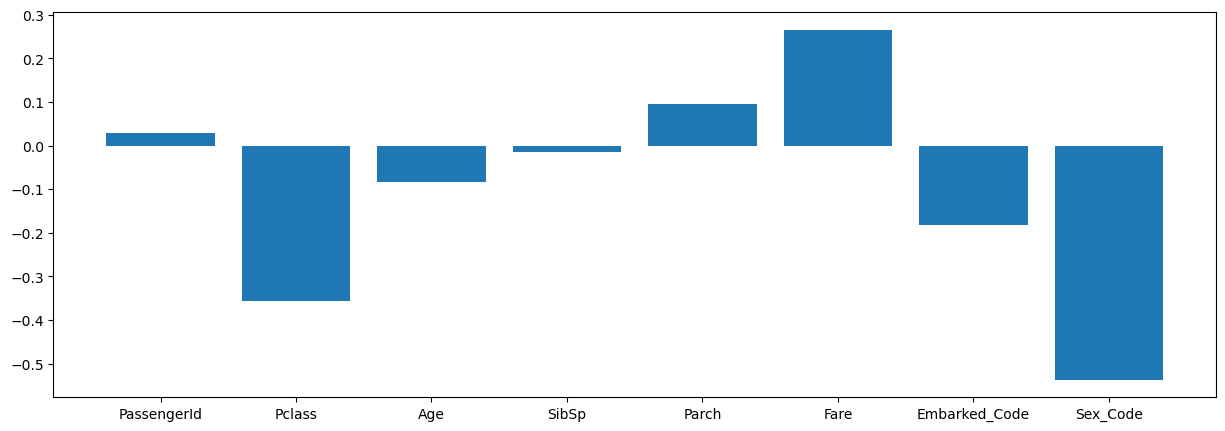

In [122]:
corr = df_numeric.corr()['Survived'].drop('Survived')

fig,ax = plt.subplots(figsize=(15, 5))
ax.bar(corr.keys(), corr.values)
plt.show()


### Observational Notes

In [ ]:
# Sex_code is by far the strongest correllate for Survival, followed by Pclass, Fare, and Embarked_Code
# Age matters far less than I would have thought. Didn't they try to save the kids? 
# Seems like fare may be redundant with Pclass, and the latter is a stronger predictor

# Let's do a test run of training a model and see what kind of baseline accuracy score we get

### Train a model

In [164]:
from sklearn.model_selection import train_test_split as tts

X = df_numeric[(col for col in df_numeric if col != 'Survived')].values
Y = df_numeric['Survived'].values

xtrain, xtest, ytrain, ytest = tts(X, Y, test_size=0.2, random_state=42)

In [165]:
print("{:.2f}% in training set".format((len(xtrain)/len(df_numeric.index))*100))
print("{:.2f}% in test set".format((len(xtest)/len(df_numeric.index))*100))

79.92% in training set
20.08% in test set


#### Normalize the data

In [166]:
from sklearn.preprocessing import StandardScaler
ss_train = StandardScaler()
xtrain = ss_train.fit_transform(xtrain)

ss_test = StandardScaler()
xtest = ss_train.fit_transform(xtest)

print(xtrain)


[[ 0.06443997 -0.28934006  0.24100362 ...  1.89356532  0.49421974
  -1.31741297]
 [-0.09105767 -0.28934006  0.87559868 ... -0.48226416  0.49421974
  -1.31741297]
 [ 0.81860357 -0.28934006 -0.32308088 ... -0.48226416  0.49421974
   0.75906343]
 ...
 [-0.45647715  0.91237159  1.08713037 ... -0.48226416  0.49421974
   0.75906343]
 [ 0.36377295 -0.28934006 -1.52176045 ...  0.70565058  0.49421974
   0.75906343]
 [-1.26117747  0.91237159 -0.6756337  ... -0.48226416  0.49421974
   0.75906343]]


#### Fit a logistic regression model

In [232]:
from sklearn.ensemble import RandomForestClassifier

rand_for = RandomForestClassifier(random_state=42)
rand_for.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [233]:
ypred = rand_for.predict(xtest)

### Check accuracy

In [234]:
from sklearn.metrics import confusion_matrix

TN, FP, FN, TP = confusion_matrix(ypred, ytest).ravel()
total = TN + FP + FN + TP

print("True Positive(TP)  = {} ({}%)".format(TP, round((TP/total)*100, 2)))
print('False Positive(FP) = {} ({}%)'.format(FP, round((FP/total)*100, 2)))
print('True Negative(TN)  = {} ({}%)'.format(TN, round((TN/total)*100, 2)))
print('False Negative(FN) = {} ({}%)'.format(FN, round((FN/total)*100, 2)))

True Positive(TP)  = 44 (30.77%)
False Positive(FP) = 19 (13.29%)
True Negative(TN)  = 71 (49.65%)
False Negative(FN) = 9 (6.29%)


In [235]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.804


In [199]:
### 80% accuracy isn't bad for a first pass. I bet I can improve it, but for now let's submit and see where it puts me on the leaderboard for initial reference
###### Interesting that removing Fare didn't change anything about the accuracy of the model

### Test against Kaggle test set

In [200]:
kaggle_test = pd.read_csv('~/Downloads/test.csv')

In [201]:
kaggle_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Apply relevant transformations and normalizations to the dataset

In [202]:
kaggle_test.drop(['Name', 'Ticket', 'Cabin', 'Fare'], axis=1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S
...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,S
414,1306,1,female,39.0,0,0,C
415,1307,3,male,38.5,0,0,S
416,1308,3,male,NaN,0,0,S


In [203]:
kaggle_test['Embarked_Code'] = oe.fit_transform(kaggle_test[['Embarked']])

In [204]:
kaggle_test['Sex_Code'] = oe.fit_transform(kaggle_test[['Sex']])

In [205]:
kaggle_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Code,Sex_Code
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0,0.0


In [206]:
kaggle_test = kaggle_test.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)

In [207]:
kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Age            332 non-null    float64
 3   SibSp          418 non-null    int64  
 4   Parch          418 non-null    int64  
 5   Embarked_Code  418 non-null    float64
 6   Sex_Code       418 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 23.0 KB


In [208]:
### looks like I'll have to impute age. Based on earlier correlation analysis I don't think it should change much

In [209]:
from sklearn.impute import SimpleImputer

In [212]:
fill_nan = SimpleImputer(missing_values=np.nan, strategy="mean")

In [214]:
kaggle_test['Age'] = fill_nan.fit_transform(kaggle_test[['Age']])

In [215]:
kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Age            418 non-null    float64
 3   SibSp          418 non-null    int64  
 4   Parch          418 non-null    int64  
 5   Embarked_Code  418 non-null    float64
 6   Sex_Code       418 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 23.0 KB


In [216]:
### Ready to predict

In [219]:
ss_kaggle = StandardScaler()
kaggle_test = ss_kaggle.fit_transform(kaggle_test)

In [221]:
kaggle_test.dtype

dtype('float64')

In [236]:
kaggle_pred = rand_for.predict(kaggle_test)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [237]:
submission = pd.DataFrame()

In [238]:
submission['Survived'] = kaggle_pred

In [239]:
keys = pd.read_csv('~/Downloads/test.csv')['PassengerId']

In [240]:
submission['PassengerId'] = keys

In [241]:
submission.sample(10)

,Survived,PassengerId
23,0,915
134,0,1026
307,1,1199
390,0,1282
185,0,1077
150,1,1042
345,1,1237
297,0,1189
412,0,1304
158,0,1050


In [243]:
submission.to_csv('~/Downloads/kaggle_titanic.csv', columns=['PassengerId', 'Survived'])